This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

In [11]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

In [12]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_origin = train_images

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_origin = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6172 - accuracy: 0.8130 - val_loss: 0.3948 - val_accuracy: 0.8788
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.9225 - val_loss: 0.1986 - val_accuracy: 0.9389
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1623 - accuracy: 0.9500 - val_loss: 0.1368 - val_accuracy: 0.9613
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9632 - val_loss: 0.1216 - val_accuracy: 0.9641
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0832 - accuracy: 0.9738 - val_loss: 0.1390 - val_accuracy: 0.9600
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0637 - accuracy: 0.9797 - val_loss: 0.1182 - val_accuracy: 0.9678
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.1259 - val_accuracy: 0.9677
Epoch 

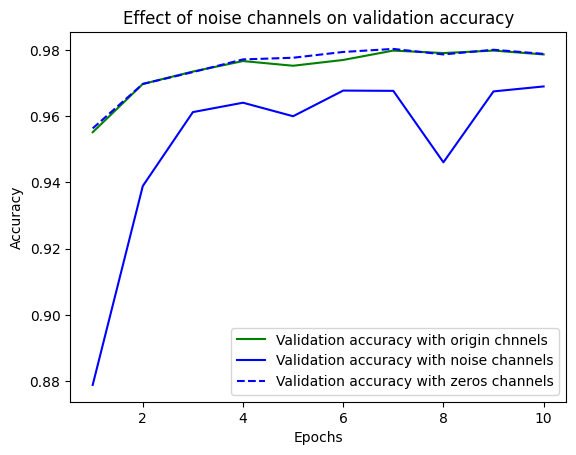

In [14]:
import matplotlib.pyplot as plt
val_acc_origin  = history_origin.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_origin, "g-",
         label="Validation accuracy with origin chnnels")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

**Plotting a validation accuracy comparison**

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [26]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels_x = train_images[:50000]
random_train_labels_y = train_labels[:50000]

random_test_labels_x = train_images[50000:]
random_test_labels_y = train_labels[50000:]

np.random.shuffle(random_train_labels_x)
np.random.shuffle(random_train_labels_y)
np.random.shuffle(random_test_labels_x)
np.random.shuffle(random_test_labels_y)


model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(random_train_labels_x,
                    random_train_labels_y,
                    epochs=20,
                    batch_size=128,
                    validation_data=(random_test_labels_x, random_test_labels_y))



Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 2.3068 - accuracy: 0.1066 - val_loss: 2.3039 - val_accuracy: 0.1073
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1142 - val_loss: 2.3058 - val_accuracy: 0.1065
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 2.2983 - accuracy: 0.1183 - val_loss: 2.3071 - val_accuracy: 0.1085
Epoch 4/20
391/391 [==============================] - 2s 4ms/step - loss: 2.2952 - accuracy: 0.1209 - val_loss: 2.3087 - val_accuracy: 0.1072
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 2.2911 - accuracy: 0.1240 - val_loss: 2.3105 - val_accuracy: 0.1040
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 2.2869 - accuracy: 0.1270 - val_loss: 2.3158 - val_accuracy: 0.1068
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 2.2816 - accuracy: 0.1303 - val_loss: 2.3190 - val_accuracy: 0.1042
Epoch 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

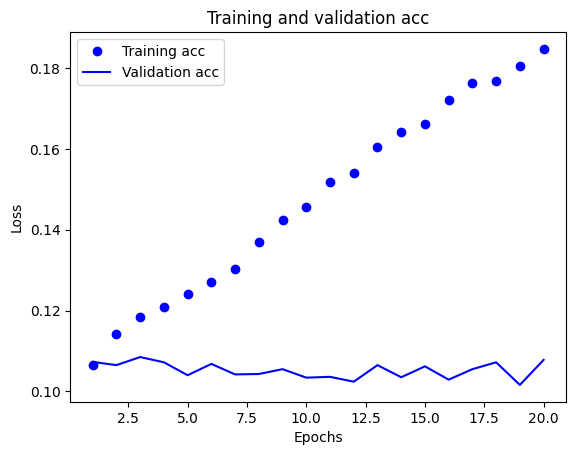

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [64]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.1),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 7.5196 - accuracy: 0.8109 - val_loss: 1.0694 - val_accuracy: 0.8677
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.6396 - accuracy: 0.8799 - val_loss: 0.5552 - val_accuracy: 0.9007
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5779 - accuracy: 0.8898 - val_loss: 0.5617 - val_accuracy: 0.8982
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5516 - accuracy: 0.8935 - val_loss: 0.5496 - val_accuracy: 0.8913
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5281 - accuracy: 0.9003 - val_loss: 0.5542 - val_accuracy: 0.9038
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.9049 - val_loss: 0.5525 - val_accuracy: 0.8905
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.9086 - val_loss: 1.0795 - val_accuracy: 0.8278
Epoch 

**The same model with a more appropriate learning rate**

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3728 - accuracy: 0.9114 - val_loss: 0.1924 - val_accuracy: 0.9478
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1289 - accuracy: 0.9649 - val_loss: 0.1330 - val_accuracy: 0.9660
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0984 - accuracy: 0.9740 - val_loss: 0.1442 - val_accuracy: 0.9689
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9790 - val_loss: 0.1644 - val_accuracy: 0.9667
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0721 - accuracy: 0.9823 - val_loss: 0.1895 - val_accuracy: 0.9678
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9842 - val_loss: 0.1771 - val_accuracy: 0.9723
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9870 - val_loss: 0.1892 - val_accuracy: 0.9743
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

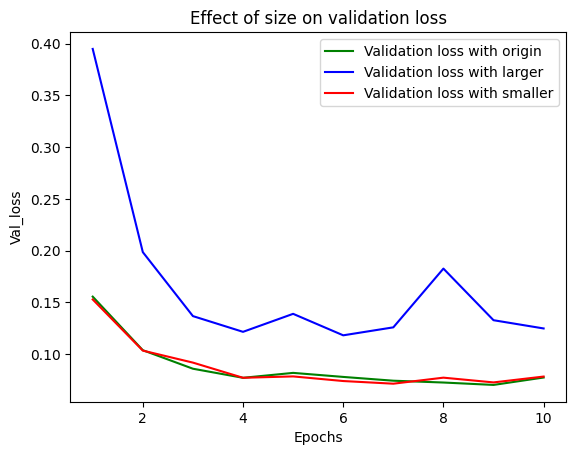

In [30]:
import matplotlib.pyplot as plt
val_loss_origin  = history_origin.history["val_loss"]
val_loss_larger = history_noise.history["val_loss"]
val_loss_smaller = history_zeros.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, val_loss_origin, "g-",
         label="Validation loss with origin")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss with larger")
plt.plot(epochs, val_loss_smaller, "r-",
         label="Validation loss with smaller")
plt.title("Effect of size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Val_loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

In [52]:
from tensorflow.keras.datasets import mnist
import numpy as np

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_images, train_labels,
    epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
94/94 [==============================] - 2s 7ms/step - loss: 1.9720 - accuracy: 0.2764 - val_loss: 1.4402 - val_accuracy: 0.6883
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 1.6478 - accuracy: 0.3958 - val_loss: 1.0601 - val_accuracy: 0.7774
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 1.4707 - accuracy: 0.4651 - val_loss: 0.8953 - val_accuracy: 0.8128
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 1.3832 - accuracy: 0.4961 - val_loss: 0.8016 - val_accuracy: 0.8367
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 1.3282 - accuracy: 0.5150 - val_loss: 0.7326 - val_accuracy: 0.8392
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 1.2808 - accuracy: 0.5399 - val_loss: 0.6786 - val_accuracy: 0.8538
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 1.2522 - accuracy: 0.5498 - val_loss: 0.6694 - val_accuracy: 0.8680
Epoch 8/20
94/94 [==

In [53]:
from tensorflow.keras.datasets import mnist
import numpy as np

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_origin = model.fit(
    train_images, train_labels,
    epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
94/94 [==============================] - 2s 7ms/step - loss: 1.3277 - accuracy: 0.6320 - val_loss: 0.7292 - val_accuracy: 0.7932
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.8478 - val_loss: 0.4074 - val_accuracy: 0.8857
Epoch 3/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8912 - val_loss: 0.3338 - val_accuracy: 0.9059
Epoch 4/20
94/94 [==============================] - 1s 5ms/step - loss: 0.3281 - accuracy: 0.9072 - val_loss: 0.2953 - val_accuracy: 0.9168
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.2949 - accuracy: 0.9157 - val_loss: 0.2718 - val_accuracy: 0.9228
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2728 - accuracy: 0.9218 - val_loss: 0.2547 - val_accuracy: 0.9259
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.2576 - accuracy: 0.9262 - val_loss: 0.2479 - val_accuracy: 0.9287
Epoch 8/20
94/94 [==

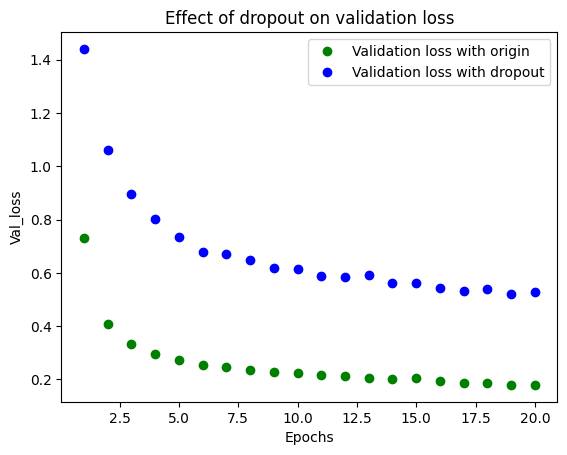

In [62]:
import matplotlib.pyplot as plt
val_loss_origin  = history_origin.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_origin, "go",
         label="Validation loss with origin")
plt.plot(epochs, val_loss_dropout, "bo",
         label="Validation loss with dropout")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Val_loss")
plt.legend()

## Summary